In [1]:
from pathlib import Path
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import geopandas
from datetime import datetime
from dateutil import tz
import glob 

%matplotlib inline

In [2]:
forecast_line = geopandas.read_file(glob.glob('data/al192020_5day_latest/*_5day_lin.shp')[0])
forecast_points = geopandas.read_file(glob.glob('data/al192020_5day_latest/*_5day_pts.shp')[0])
forecast_cone = geopandas.read_file(glob.glob('data/al192020_5day_latest/*_5day_pgn.shp')[0])

In [3]:
map_crs = ccrs.Mercator()
data_crs = ccrs.PlateCarree()

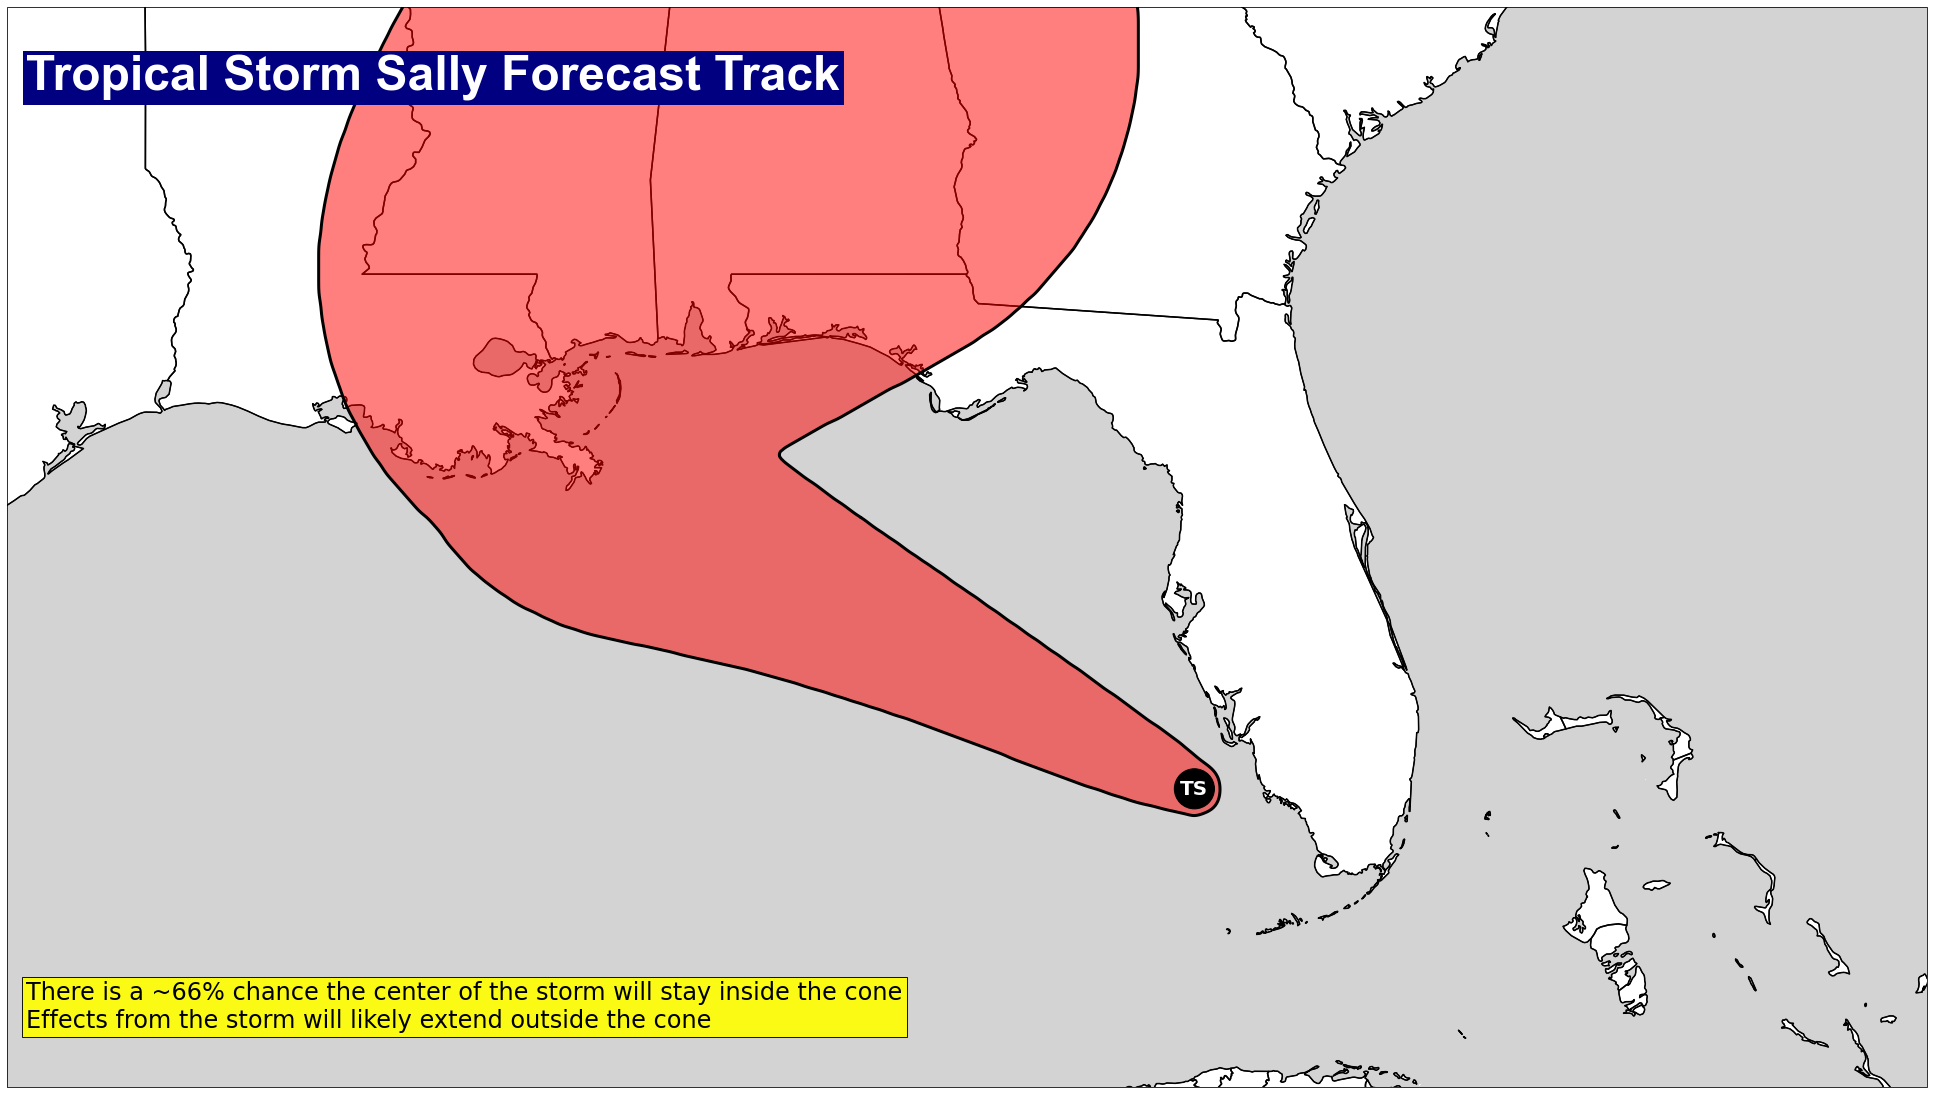

In [4]:
# Setup and display matplotlib figure
fig = plt.figure(figsize=(1920/72, 1080/72))
ax = fig.add_axes([0, 0, 1, 1], projection=map_crs)
ax.set_adjustable('datalim')

#Atlantic Basin
ax.set_extent([-95, -75, 23, 33.5], data_crs)
#ax.set_extent([-100, -10, 5, 42], data_crs)

# Setup borders (states, countries, coastlines, etc)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=1.5)
ax.add_feature(cfeature.OCEAN.with_scale('10m'), color='lightgray')

'''
Plot the forecast cone
'''
cone = forecast_cone['geometry']
if len(cone) > 0:
    ax.add_geometries(cone, crs=data_crs, facecolor='red', alpha=0.5, zorder=1)
    ax.add_geometries(cone, crs=data_crs, facecolor='none', alpha=1.0, edgecolor='black', linewidth=3, zorder=2)

'''
Plot the center line of the track
'''
# geometries = forecast_line['geometry']
# if len(geometries) > 0:
#     ax.add_geometries(geometries, crs=data_crs,
#                       facecolor='none', edgecolor='gray',
#                       linewidth=3, linestyle='--', zorder=2)


# Forecast points
# points = forecast_points['geometry']

# ax.scatter([point.x for point in points],
#            [point.y for point in points],
#            c='black', marker='o', s=50, zorder=3, transform=data_crs)

# max_winds = forecast_points['DVLBL']
# for fhr, point in enumerate(points):
#     ax.text(point.x, point.y, max_winds[fhr], 
#             horizontalalignment='center', verticalalignment='center', color='white', fontweight='bold', fontsize=20,
#             zorder=3, bbox=dict(facecolor='black', alpha=0.9, boxstyle='circle'), transform=data_crs)


# Initial position
storm_classification_init = forecast_points['STORMTYPE'][0]
storm_longitude_init = forecast_points['geometry'][0].x
storm_latitude_init = forecast_points['geometry'][0].y
ax.text(storm_longitude_init, storm_latitude_init, storm_classification_init, 
        horizontalalignment='center', verticalalignment='center', color='white', fontweight='bold', fontsize=20,
        zorder=3, bbox=dict(facecolor='black', edgecolor='black', boxstyle='circle'), transform=data_crs)

info_box_string = ('There is a ~66% chance the center of the storm will stay inside the cone\n'
                    'Effects from the storm will likely extend outside the cone')
plt.text(0.01, 0.05, s=info_box_string, fontsize=24, bbox=dict(facecolor='yellow', alpha=0.9), 
         transform=ax.transAxes, zorder=4, va='bottom')

ax.set_title('Tropical Storm Sally Forecast Track', loc='left', 
             ha='left', va='top', fontsize=48, color='white', 
             fontweight='bold', fontname='Arial', y=0.95, x=0.01,
             bbox=dict(facecolor='navy', alpha=1.0, edgecolor='none'))

graphics_dir = Path('.') / '..' / '..' / 'graphics' / 'nhc'
plt.savefig(f'{graphics_dir}/cone.png', dpi=72)

<Figure size 432x288 with 0 Axes>